In [180]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scipy

In [181]:
data_dir='/home/wizard/Documents/observing_the_ocean/anna_wahlin/exercises/data/'

In [182]:
dat=scipy.loadmat(data_dir+'Exercise_1_data.mat')
dat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'lat', 'lon', 'pres_en_cours', 'sal', 'temp'])

In [183]:
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

Text(0,0.5,'Lat')

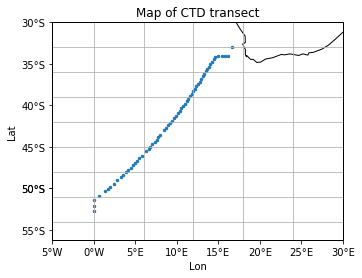

In [184]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-5,30,-55,-30])
ax.coastlines()
ax.gridlines()
ax.scatter(dat['lon'],dat['lat'],transform=ccrs.PlateCarree(),marker='o',s=6)
ax.set_xticks([-5,0,5,10,15,20,25,30], crs=ccrs.PlateCarree())
ax.set_yticks([-55,-50,-50,-45,-40,-35,-30], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
plt.title('Map of CTD transect')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')

In [185]:
#### Plot vertical section of temperature and salinity

Text(0.5,1,'Practical Salinity')

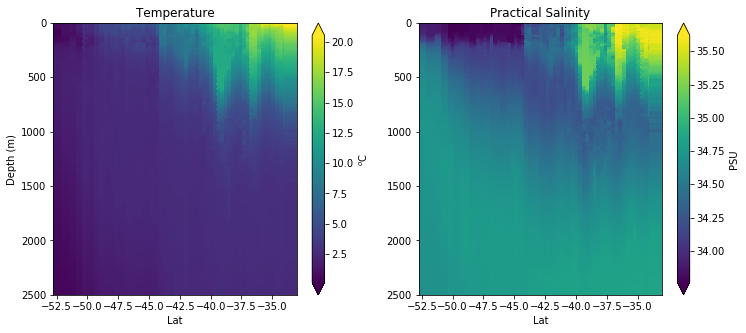

In [186]:
fig,ax=plt.subplots(1,2,figsize=([12,5]))
xx,yy=np.meshgrid(dat['lat'],dat['pres_en_cours'])
temp_plot=ax[0].pcolormesh(xx,yy,dat['temp'].T)
ax[0].invert_yaxis()
cbar1=fig.colorbar(temp_plot,ax=ax[0],extend='both')
cbar1.set_label('$^{o}$C')
ax[0].set_xlabel('Lat')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('Temperature')
salt_plot=ax[1].pcolormesh(xx,yy,dat['sal'].T)
ax[1].invert_yaxis()
cbar2=fig.colorbar(salt_plot,ax=ax[1],extend='both')
cbar2.set_label('PSU')
ax[1].set_xlabel('Lat')
ax[1].set_title('Practical Salinity')

Compute absolute salinity, potential temperature and potential density with varying pressure

In [187]:
import gsw as gsw

In [188]:
#absolute salinity from practical salinity
abs_sal=gsw.SA_from_SP(dat['sal'],dat['pres_en_cours'],dat['lon'],dat['lat'])
#conservative temperature from in situ temperature
tcons=gsw.CT_from_t(abs_sal,dat['temp'],dat['pres_en_cours'])
#in situ density
dens=gsw.rho(abs_sal,tcons,dat['pres_en_cours'])

In [189]:
#### Ref Pressure = 0
p_ref=0
pot_dens0=gsw.pot_rho_t_exact(abs_sal,dat['temp'],dat['pres_en_cours'],p_ref)
pot_temp0=gsw.pt_from_t(abs_sal,dat['temp'],dat['pres_en_cours'],p_ref)

In [190]:
#### Ref Pressure = 2500
p_ref=2500
pot_dens2500=gsw.pot_rho_t_exact(abs_sal,dat['temp'],dat['pres_en_cours'],p_ref)
pot_temp2500=gsw.pt_from_t(abs_sal,dat['temp'],dat['pres_en_cours'],p_ref)

In [191]:
#### Ref Pressure = 4000
p_ref=4000
pot_dens4000=gsw.pot_rho_t_exact(abs_sal,dat['temp'],dat['pres_en_cours'],p_ref)
pot_temp4000=gsw.pt_from_t(abs_sal,dat['temp'],dat['pres_en_cours'],p_ref)

[-39.18433]


Text(0.5,1,'Density at [-39.18433]')

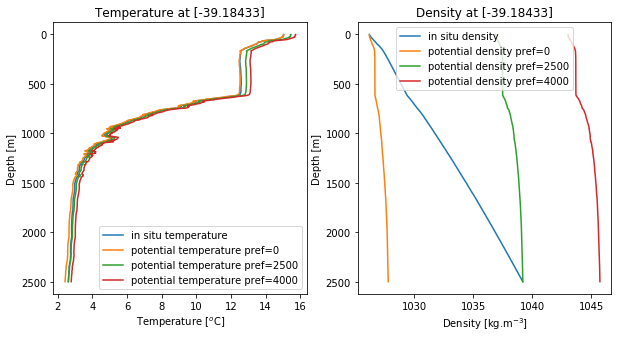

In [192]:
# plot vertical sections comparing stations pot temp, temp, pot dens, dens
print(dat['lat'][40])

fig,ax=plt.subplots(1,2,figsize=[10,5])
ax[0].plot(dat['temp'][40,:],dat['pres_en_cours'].T,label='in situ temperature')
ax[0].plot(pot_temp0[40,:],dat['pres_en_cours'].T,label='potential temperature pref=0')
ax[0].plot(pot_temp2500[40,:],dat['pres_en_cours'].T,label='potential temperature pref=2500')
ax[0].plot(pot_temp4000[40,:],dat['pres_en_cours'].T,label='potential temperature pref=4000')
ax[0].legend()
ax[0].invert_yaxis()
ax[0].set_xlabel('Temperature [${^o}$C]')
ax[0].set_ylabel('Depth [m]')
ax[0].set_title('Temperature at {}' .format(dat['lat'][40]))
ax[1].plot(dens[40,:],dat['pres_en_cours'].T,label='in situ density')
ax[1].plot(pot_dens0[40,:],dat['pres_en_cours'].T,label='potential density pref=0')
ax[1].plot(pot_dens2500[40,:],dat['pres_en_cours'].T,label='potential density pref=2500')
ax[1].plot(pot_dens4000[40,:],dat['pres_en_cours'].T,label='potential density pref=4000')
ax[1].legend()
ax[1].invert_yaxis()
ax[1].set_xlabel('Density [kg.m$^{-3}$]')
ax[1].set_ylabel('Depth [m]')
ax[1].set_title('Density at {}' .format(dat['lat'][40]))



Main differences at depth: Potential temperature: Potential temperature
at depth varies the most in comparison with in situ temperature as the reference pressure
is deepened. In situ and ref pressure at 0 are almost equivalent. Potential density: Large differences between in situ density and potential density.Potential density increases approx. 5kg/m3 per 1000bar change in reference pressure.

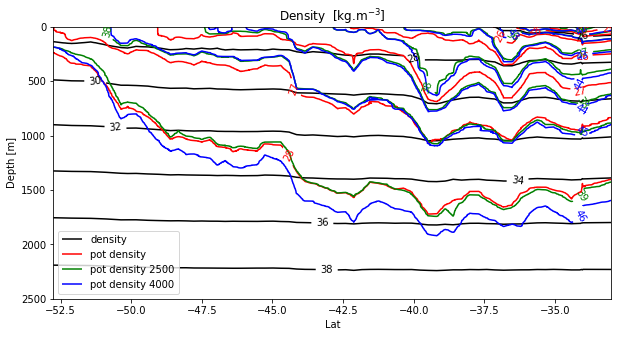

In [193]:
# Is there unstable stratification? 
# Look at full section
fig,ax=plt.subplots(1,1,figsize=[10,5])
xx,yy=np.meshgrid(dat['lat'],dat['pres_en_cours'])

dens_cont=ax.contour(xx,yy,(dens-1000).T,colors='k')
ax.clabel(dens_cont,inline=1,fmt='%1.0f',fontsize=10)

pot_dens_cont=ax.contour(xx,yy,(pot_dens0-1000).T,colors='r')
ax.clabel((pot_dens_cont),inline=1,fmt='%1.0f',fontsize=10)

pot_dens2_cont=ax.contour(xx,yy,(pot_dens2500-1000).T,colors='g')
ax.clabel((pot_dens2_cont),inline=1,fmt='%1.0f',fontsize=10)

pot_dens4_cont=ax.contour(xx,yy,(pot_dens4000-1000).T,colors='b')
ax.clabel((pot_dens4_cont),inline=1,fmt='%1.0f',fontsize=10)

ax.invert_yaxis()
ax.set_xlabel('Lat')
ax.set_ylabel('Depth [m]')
ax.set_title('Density  [kg.m$^{-3}$] ')
h1,_ = dens_cont.legend_elements()
h2,_ = pot_dens_cont.legend_elements()
h3,_ = pot_dens2_cont.legend_elements()
h4,_ = pot_dens4_cont.legend_elements()
ax.legend([h1[0], h2[0], h3[0], h4[0]],  ['density', 'pot density', 'pot density 2500', 'pot density 4000'],loc=3)

Did not see any unstable stratification: where lines of low potential density are lying below lines of high potential density. To the north isopycnals are quite variable, changing rapidly in depth.  

In [194]:
def haversine(lat1, lon1, lat2, lon2):
    import numpy as np
    R=6378.137
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    total_m = (R * c)*1000
    return total_m

In [195]:
dist=haversine(dat['lat'][1:],dat['lon'][1:],dat['lat'][:-1],dat['lon'][:-1])
dist_order=dist.cumsum()

Text(0.5,1,'Potential Density')

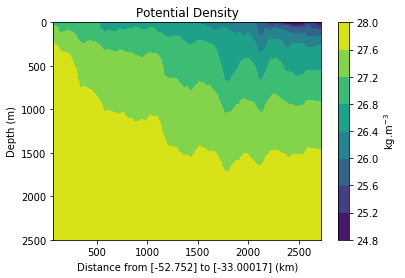

In [196]:
xx,yy=np.meshgrid(dist_order,dat['pres_en_cours'])
cf=plt.contourf(xx/1000,yy,(pot_dens0[:-1,:]-1000).T)
plt.gca().invert_yaxis()
plt.xlabel('Distance from {} to {} (km)'.format(dat['lat'][0],dat['lat'][-1]))
plt.ylabel('Depth (m)')
cbar=plt.colorbar(cf)
cbar.set_label('kg.m$^{-3}$')
plt.title('Potential Density')

In [197]:
#### compute horizontal derivative of potential density

In [198]:
del_pot_dens0=(pot_dens0[1:,:]-pot_dens0[:-1,:])/dist

Text(0.5,1,'Horizontal density gradient')

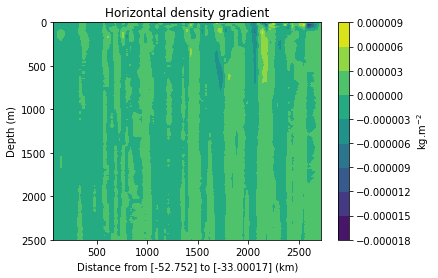

In [199]:
cf=plt.contourf(xx/1000,yy,del_pot_dens0.T)
plt.gca().invert_yaxis()
plt.xlabel('Distance from {} to {} (km)'.format(dat['lat'][0],dat['lat'][-1]))
plt.ylabel('Depth (m)')
cbar=plt.colorbar(cf)
cbar.set_label('kg.m$^{-2}$')
plt.title('Horizontal density gradient')

Geostrophic vertical shear using the thermal wind equation The relationship between the
geostrophic vertical shear and the horizontal density gradient is given by the thermal wind equation
-fdv/dz=(g/rho0)(drhodx)

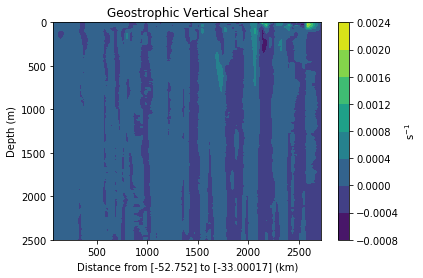

In [202]:
#compute coriolis acceleration
def coriolis_acc(lat,omega=0.729*10**-4):
    return 2*omega*np.sin(lat/360.*2*np.pi)

f=coriolis_acc(dat['lat'])
g=-9.8 # define gravitaional acceleration
ref_dens=1000.
geo_vert_shear=-((g/ref_dens)*(del_pot_dens0))/f[:-1]
#plot
cf=plt.contourf(xx/1000,yy,geo_vert_shear.T)
plt.gca().invert_yaxis()
plt.xlabel('Distance from {} to {} (km)'.format(dat['lat'][0],dat['lat'][-1]))
plt.ylabel('Depth (m)')
plt.title('Geostrophic Vertical Shear')
cbar=plt.colorbar(cf)
cbar.set_label('s$^{-1}$')


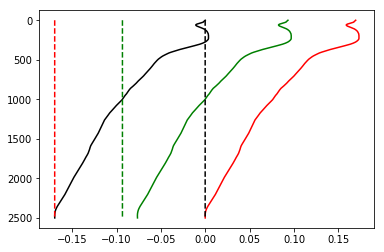

In [203]:
#### Compute geostrophic velocity with level of no motion at 1000m
idx=abs(dat['pres_en_cours']-1000.).argmin()

geo_vel=(np.cumsum(geo_vert_shear,axis=1))

nomotion_surf=np.reshape(np.tile(geo_vel[:,0],2500),(2500,62))
nomotion_1000=np.reshape(np.tile(geo_vel[:,idx],2500),(2500,62))
nomotion_bot=np.reshape(np.tile(geo_vel[:,-1],2500),(2500,62))

geo_vel0=geo_vel-nomotion_surf.T
geo_vel1000=geo_vel-nomotion_1000.T
geo_velbot=geo_vel-nomotion_bot.T

plt.figure()
plt.plot(geo_vel0[30,:],dat['pres_en_cours'].T,c='k')
plt.plot(geo_vel1000[30,:],dat['pres_en_cours'].T,c='g')
plt.plot(geo_velbot[30,:],dat['pres_en_cours'].T,c='r')
plt.plot(nomotion_surf[:,30],dat['pres_en_cours'].T,linestyle='--',c='k')
plt.plot(nomotion_1000[:,30],dat['pres_en_cours'].T,linestyle='--',c='g')
plt.plot(nomotion_bot[:,30],dat['pres_en_cours'].T,linestyle='--',c='r')

plt.gca().invert_yaxis()




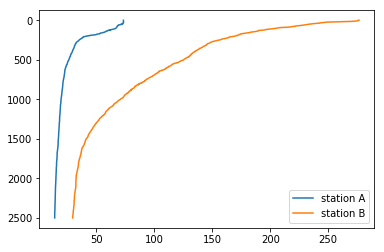

In [179]:
# Compute specific volume anomaly
alpha=gsw.specvol(abs_sal,tcons,dat['pres_en_cours'])
alpha_ref=gsw.specvol(35,0,dat['pres_en_cours'])
alpha_ano=alpha-alpha_ref

plt.plot(alpha_ano[0,:]*10**8,dat['pres_en_cours'].flatten(),label='station A')
plt.plot(alpha_ano[-1,:]*10**8,dat['pres_en_cours'].flatten(),label='station B')
plt.legend()
plt.gca().invert_yaxis()
# 10**-8m^3/kg


Compute the Steric Height Anomaly Defined by Tomctak and Godfrey 1994
h’=integral(specific volume anomaly * ref dens dz)
ref_dens=rho(35,0,p)

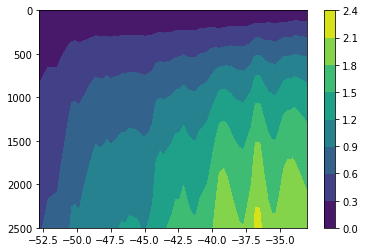

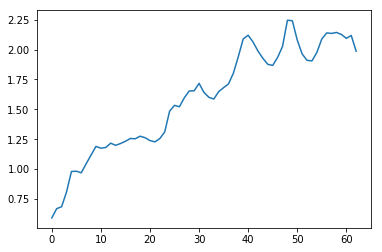

In [170]:
ref_dens=gsw.rho(35,0,dat['pres_en_cours'])
dens_anomaly=pot_dens0-ref_dens
depth,_=np.meshgrid(dat['pres_en_cours'],dat['lat'])

# tmp=alpha_ano[:,:-1]*
# ref_dens[:,:-1]
tmp=alpha_ano[:,:-1]*1000
h=np.cumsum(tmp,axis=1)
xx,yy=np.meshgrid(dat['lat'],dat['pres_en_cours'][:,:-1])

plt.contourf(xx,yy,h.T)
plt.gca().invert_yaxis()
plt.colorbar()
# plt.plot(h)


#or:
plt.figure()
h1=np.sum(alpha_ano[:,:-1]*ref_dens[:,:-1],axis=1)
plt.plot(h1)

#or
# xx,yy=np.meshgrid(dat['lat'],dat['pres_en_cours'])

# h2=np.cumsum(pot_dens0,axis=1)*(-1/1000)
# plt.figure()
# plt.contourf(xx,yy,h2.T)
# plt.gca().invert_yaxis()
# plt.colorbar() 


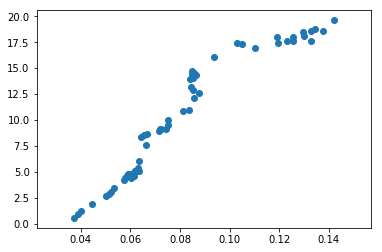

In [171]:
#Plot temperature as a function of dynamic height
plt.scatter(h[:,50],tcons[:,50])

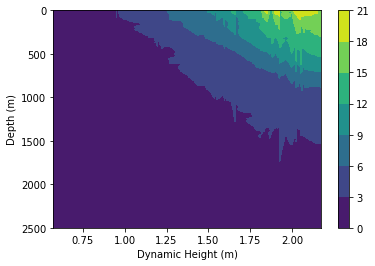

In [172]:
#Cross section of temperature as a function of depth and dynamic height

#h' at surf
h1=(h[:,-1])
ind=np.argsort((h1))
xx,yy=np.meshgrid(h1[ind],dat['pres_en_cours'])
tdyn=tcons[ind]
plt.contourf(xx,yy,tdyn.T)
plt.gca().invert_yaxis()
plt.xlabel('Dynamic Height (m)')
plt.ylabel('Depth (m)')
plt.colorbar(extend='both')

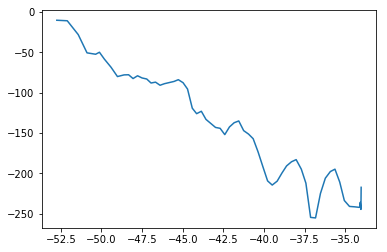

In [173]:
geo_sta=np.sum(geo_vel0*dist*1,axis=1)
geo_cum_trans=np.cumsum(geo_sta,axis=0)
geo_cum_trans.shape
geo_sta.shape

# Q = 0
# for i in range(len(dist)):
#     for j in range(len(dat['pres_en_cours'])):
#                  Q += geo_vel1000[i,j]*dist[i]*1
        
# Q.shape
# Q
plt.plot(dat['lat'][:-1],geo_cum_trans/10**6)


In [37]:
def mld_profile(dens_or_temp, depth, thresh, ref_depth, mask=False):

    i = np.nanargmin(np.abs(depth - ref_depth))
    if np.isnan(dens_or_temp[i]):
        mld = np.nan
    else:
        dd = dens_or_temp - dens_or_temp[i]  # density difference
        dd[depth < ref_depth] = np.nan
        abs_dd = abs(dd - thresh)
        depth_idx = np.nanargmin(abs_dd)
        mld = depth[depth_idx]
    if mask:
        return depth <= mld
    else:
        return mld

In [100]:
mld=mld_profile(pot_dens0[-1,:],dat['pres_en_cours'].flatten(),0.03,10)
# mldIX=dat['pres_en_cours']==14
h0=mld
h0



14

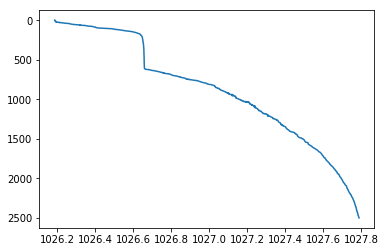

In [124]:
# plot density profile at northern most limit of transect
plt.plot(pot_dens0[40,:],dat['pres_en_cours'].flatten())
# plt.ylim(0,100)
plt.gca().invert_yaxis()
#h0 is the depth at max change in density 

In [125]:
#Geostrophic transport capacity
gravity_reduced=(g*(pot_dens0[1:]-pot_dens0[:-1]))/ref_dens
ff=np.tile(f,2500)
h0=100 #height at difference in density at the mld
Qgeo=0.5*(gravity_reduced/ff[:-1,:])*h0**2


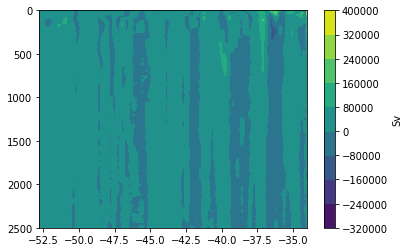

In [126]:
xx,yy=np.meshgrid(dat['lat'][:-1],dat['pres_en_cours'])
plt.contourf(xx,yy,Qgeo.T)
plt.gca().invert_yaxis()
cbar=plt.colorbar()
cbar.set_label('Sv')